***Importing libraries***

In [1]:
#import libs and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [2]:
#reading csv file
df=pd.read_csv("/content/Train_Loan_Home.csv");

**Analyzing given dataset**

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


**Ordering into proper dataset**

In [6]:
#column check to drop unwanted columns 
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
# dropping unused columns to make data frame free from redundant and dead columns
df_new = df.drop(["Loan_ID","Gender","Married"], axis=1)

In [8]:
df_new['Dependents'].replace(
    to_replace=['3+'],
    value='4',
    inplace=True
)

In [9]:
df_new['Education'].replace(
    to_replace=['Not Graduate'],
    value='0',
    inplace=True
)
df_new['Education'].replace(
    to_replace=['Graduate'],
    value='1',
    inplace=True
)

In [10]:
df_new['Self_Employed'].replace(
    to_replace=['Yes'],
    value='1',
    inplace=True
)
df_new['Self_Employed'].replace(
    to_replace=['No'],
    value='0',
    inplace=True
)

In [11]:
df_new['Property_Area'].replace(
    to_replace=['Urban'],
    value='1',
    inplace=True
)
df_new['Property_Area'].replace(
    to_replace=['Rural'],
    value='2',
    inplace=True
)
df_new['Property_Area'].replace(
    to_replace=['Semiurban'],
    value='2',
    inplace=True
)

In [12]:
df_new['Loan_Status'].replace(
    to_replace=['N'],
    value='0',
    inplace=True
)
df_new['Loan_Status'].replace(
    to_replace=['Y'],
    value='1',
    inplace=True
)

In [13]:
df_new.isnull().sum()

Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
# df_new.dropna('Dependents')
df_new.dropna(0, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  


**Analyzing new ordered dataset**

In [15]:
df_new.head()

,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,0,4583,1508.0,128.0,360.0,1.0,2,0
2,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1


In [16]:
df_new.dtypes

Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [17]:
df_new.tail()

,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,0,1,0,2900,0.0,71.0,360.0,1.0,2,1
610,4,1,0,4106,0.0,40.0,180.0,1.0,2,1
611,1,1,0,8072,240.0,253.0,360.0,1.0,1,1
612,2,1,0,7583,0.0,187.0,360.0,1.0,1,1
613,0,1,1,4583,0.0,133.0,360.0,0.0,2,0


In [18]:
df_new.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,492.000000,492.000000,492.000000,492.000000,492.000000
mean,5502.203252,1572.959187,146.390244,342.000000,0.851626
std,6069.324665,2597.096132,84.352947,64.902747,0.355832
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5936.500000,2250.000000,170.500000,360.000000,1.000000
max,81000.000000,33837.000000,700.000000,480.000000,1.000000


In [19]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 492 entries, 1 to 613
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Dependents         492 non-null    object 
 1   Education          492 non-null    object 
 2   Self_Employed      492 non-null    object 
 3   ApplicantIncome    492 non-null    int64  
 4   CoapplicantIncome  492 non-null    float64
 5   LoanAmount         492 non-null    float64
 6   Loan_Amount_Term   492 non-null    float64
 7   Credit_History     492 non-null    float64
 8   Property_Area      492 non-null    object 
 9   Loan_Status        492 non-null    object 
dtypes: float64(4), int64(1), object(5)
memory usage: 42.3+ KB


In [20]:
df_new.isnull().sum()

Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

***Splitting the Dataset***

In [21]:
x=df_new.drop(['Loan_Status'],axis=1);

In [22]:
y=df_new['Loan_Status']

In [23]:
print(x)
print(y)

    Dependents Education Self_Employed  ApplicantIncome  CoapplicantIncome  \
1            1         1             0             4583             1508.0   
2            0         1             1             3000                0.0   
3            0         0             0             2583             2358.0   
4            0         1             0             6000                0.0   
5            2         1             1             5417             4196.0   
..         ...       ...           ...              ...                ...   
609          0         1             0             2900                0.0   
610          4         1             0             4106                0.0   
611          1         1             0             8072              240.0   
612          2         1             0             7583                0.0   
613          0         1             1             4583                0.0   

     LoanAmount  Loan_Amount_Term  Credit_History Property_Area

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)

In [25]:
print(x_train)
print(x_test)

    Dependents Education Self_Employed  ApplicantIncome  CoapplicantIncome  \
270          0         1             0             3237                0.0   
215          4         0             0             3850              983.0   
356          2         1             0             8333             3167.0   
283          0         1             0             1811             1666.0   
38           0         1             0             4166             7210.0   
..         ...       ...           ...              ...                ...   
378          0         1             0             3069                0.0   
27           2         0             0             4226             1040.0   
90           0         1             0             2958             2900.0   
18           0         0             0             4887                0.0   
210          0         1             0            10000                0.0   

     LoanAmount  Loan_Amount_Term  Credit_History Property_Area

In [26]:
print(y_train)
print(y_test)

270    1
215    1
356    1
283    1
38     1
      ..
378    0
27     1
90     1
18     0
210    0
Name: Loan_Status, Length: 344, dtype: object
469    0
288    1
537    1
203    1
570    1
      ..
271    1
406    1
427    1
152    0
415    1
Name: Loan_Status, Length: 148, dtype: object


***Applying logistic Regression***

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
reg=LogisticRegression()

In [29]:
reg.fit(x_train,y_train)

LogisticRegression()

In [30]:
y_train_pred=reg.predict(x_train)

In [31]:
y_test_pred=reg.predict(x_test)

In [32]:
print("The training accuracy is",accuracy_score(y_train, y_train_pred))

The training accuracy is 0.813953488372093


In [33]:
print("The test accuracy is",accuracy_score(y_test, y_test_pred))

The test accuracy is 0.8040540540540541


In [34]:
reg_test_acc=accuracy_score(y_test, y_test_pred)
reg_train_acc=accuracy_score(y_train, y_train_pred)

In [35]:
confusion_matrix(y_test, y_test_pred, labels=None, sample_weight=None, normalize=None)

array([[ 19,  27],
       [  2, 100]])

In [36]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_test_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_test_pred,average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_test_pred,average='weighted')
print('Recall: %f' % recall)

Accuracy: 0.804054
Precision: 0.823878
Recall: 0.804054


***Applying SVM***

In [37]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf')
svm.fit(x_train,y_train)

SVC()

In [38]:
y_train_pred=svm.predict(x_train)
y_test_pred=svm.predict(x_test)

In [39]:
print("The training accuracy is",accuracy_score(y_train, y_train_pred))
print("The test accuracy is",accuracy_score(y_test, y_test_pred))

The training accuracy is 0.6976744186046512
The test accuracy is 0.6824324324324325


In [40]:
y_pred=svm.predict(x)
print("The accuracy is",accuracy_score(y, y_pred))

The accuracy is 0.693089430894309


In [41]:
svm_test_acc=accuracy_score(y_test, y_test_pred)
svm_train_acc=accuracy_score(y_train, y_train_pred)

In [42]:
confusion_matrix(y_test, y_test_pred, labels=None, sample_weight=None, normalize=None)

array([[  0,  46],
       [  1, 101]])

In [43]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_test_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_test_pred,average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_test_pred,average='weighted')
print('Recall: %f' % recall)

Accuracy: 0.682432
Precision: 0.473525
Recall: 0.682432


***Applying Random Forest***

In [44]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100) 
rf.fit(x_train, y_train)


RandomForestClassifier()

In [45]:
# performing predictions on the test dataset
y_test_pred = rf.predict(x_test)
# performing predictions on the train dataset
y_train_pred = rf.predict(x_train)


In [46]:
y_pred=rf.predict(x)

In [47]:
# using metrics module for accuracy calculation
print("ACCURACY OF THE TEST MODEL: ", accuracy_score(y_test, y_test_pred))


ACCURACY OF THE TEST MODEL:  0.777027027027027


In [48]:
print("ACCURACY OF THE TRAIN MODEL: ", accuracy_score(y_train, y_train_pred))

ACCURACY OF THE TRAIN MODEL:  1.0


In [49]:
rf_test_acc=accuracy_score(y_test, y_test_pred)
rf_train_acc=accuracy_score(y_train, y_train_pred)

In [50]:
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ",accuracy_score(y, y_pred))

ACCURACY OF THE MODEL:  0.9329268292682927


In [51]:
confusion_matrix(y_test, y_test_pred, labels=None, sample_weight=None, normalize=None)

array([[20, 26],
       [ 7, 95]])

In [52]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_test_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_test_pred,average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_test_pred,average='weighted')
print('Recall: %f' % recall)

Accuracy: 0.777027
Precision: 0.771329
Recall: 0.777027


***Applying NN***

In [53]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification

In [54]:
nn = MLPClassifier(random_state=2, max_iter=100).fit(x_train, y_train)

In [55]:
# performing predictions on the test dataset
y_test_pred = nn.predict(x_test)
# performing predictions on the train dataset
y_train_pred = nn.predict(x_train)

In [56]:
y_pred=nn.predict(x)

In [57]:
# using metrics module for accuracy calculation
print("ACCURACY OF THE TRAIN MODEL: ", accuracy_score(y_test, y_test_pred))

ACCURACY OF THE TRAIN MODEL:  0.7094594594594594


In [58]:
print("ACCURACY OF THE TEST MODEL: ", accuracy_score(y_train, y_train_pred))

ACCURACY OF THE TEST MODEL:  0.6976744186046512


In [59]:
nn_test_acc=accuracy_score(y_test, y_test_pred)
nn_train_acc=accuracy_score(y_train, y_train_pred)

In [60]:
confusion_matrix(y_test, y_test_pred, labels=None, sample_weight=None, normalize=None)

array([[  4,  42],
       [  1, 101]])

In [61]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_test_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_test_pred,average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_test_pred,average='weighted')
print('Recall: %f' % recall)

Accuracy: 0.709459
Precision: 0.735419
Recall: 0.709459


***Accuracy Plot ***

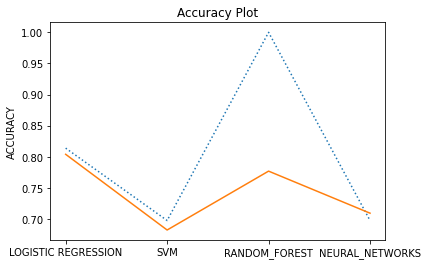

In [67]:
trainpoints =  np.array([reg_train_acc,svm_train_acc,rf_train_acc,nn_train_acc])
testpoints = np.array([reg_test_acc,svm_test_acc,rf_test_acc,nn_test_acc])
labels=np.array(["LOGISTIC REGRESSION","SVM","RANDOM_FOREST","NEURAL_NETWORKS"])
plt.plot(labels,trainpoints, linestyle = 'dotted')

plt.plot(labels,testpoints, linestyle = 'solid',label=labels)
plt.title("Accuracy Plot")
# plt.xlabel("ALGORITHM")
plt.ylabel("ACCURACY")
plt.show()